In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!pip install efficient_apriori

In [46]:
from efficient_apriori import apriori

In [56]:
df = pd.read_csv("1000i.csv",names = ['Receipt_number','Quantity','food'])

In [57]:
df

,Receipt_number,Quantity,food
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [58]:
dict1 = {
     1:"Chocolate Cake",2:"Lemon Cake",3:"Casino Cake",4:"Opera Cake",5: "Strawberry Cake",6: "Truffle Cake",7: "Chocolate Eclair",8: "Coffee Eclair",9: "Vanilla Eclair",10: "Napolean Cake",11: "Almond Tart",12: "Apple Pie",13: "Apple Tart",14:"Apricot Tart",15: "Berry Tart",16: "Blackberry Tart",17: "Blueberry Tart",18: "Chocolate Tart",19: "Cherry Tart",20: "Lemon Tart",21: "Pecan Tart",22: "Ganache Cookie",23: "Gongolais Cookie",24: "Raspberry Cookie",25: "Lemon Cookie",26: "Chocolate Meringue",27: "Vanilla Meringue",28: "Marzipan Cookie",29: "Tuile Cookie",30: "Walnut Cookie",31: "Almond Croissant",32: "Apple Croissant",33: "Apricot Croissant",34: "Cheese Croissant",35: "Chocolate Croissant",36: "Apricot Danish",37: "Apple Danish",38: "Almond Twist",39: "Almond Bear_Claw",40: "Blueberry Danish",41: "Lemon Lemonade",42: "Raspberry Lemonade",43: "Orange Juice",44: "Green Tea",45: "Bottled Water",46: "Hot Coffee",47: "Chocolate Coffee",48: "Vanilla Frappucino",49: "Cherry Soda",0: "Single Espresso"
}
dict1

{1: 'Chocolate Cake',
 2: 'Lemon Cake',
 3: 'Casino Cake',
 4: 'Opera Cake',
 5: 'Strawberry Cake',
 6: 'Truffle Cake',
 7: 'Chocolate Eclair',
 8: 'Coffee Eclair',
 9: 'Vanilla Eclair',
 10: 'Napolean Cake',
 11: 'Almond Tart',
 12: 'Apple Pie',
 13: 'Apple Tart',
 14: 'Apricot Tart',
 15: 'Berry Tart',
 16: 'Blackberry Tart',
 17: 'Blueberry Tart',
 18: 'Chocolate Tart',
 19: 'Cherry Tart',
 20: 'Lemon Tart',
 21: 'Pecan Tart',
 22: 'Ganache Cookie',
 23: 'Gongolais Cookie',
 24: 'Raspberry Cookie',
 25: 'Lemon Cookie',
 26: 'Chocolate Meringue',
 27: 'Vanilla Meringue',
 28: 'Marzipan Cookie',
 29: 'Tuile Cookie',
 30: 'Walnut Cookie',
 31: 'Almond Croissant',
 32: 'Apple Croissant',
 33: 'Apricot Croissant',
 34: 'Cheese Croissant',
 35: 'Chocolate Croissant',
 36: 'Apricot Danish',
 37: 'Apple Danish',
 38: 'Almond Twist',
 39: 'Almond Bear_Claw',
 40: 'Blueberry Danish',
 41: 'Lemon Lemonade',
 42: 'Raspberry Lemonade',
 43: 'Orange Juice',
 44: 'Green Tea',
 45: 'Bottled Water',

In [59]:
df['food'] = df['food'].replace(dict1)

In [60]:
df

,Receipt_number,Quantity,food
0,1,3,Chocolate Eclair
1,1,4,Berry Tart
2,1,2,Cherry Soda
3,1,5,Green Tea
4,2,1,Chocolate Cake
...,...,...,...
3533,999,5,Chocolate Croissant
3534,999,2,Casino Cake
3535,1000,4,Berry Tart
3536,1000,3,Chocolate Coffee


In [61]:
transactions = df.groupby(df['Receipt_number'])['food'].apply(lambda x : list(x))

In [62]:
transactions

Receipt_number
1       [Chocolate Eclair, Berry Tart, Cherry Soda, Gr...
2                           [Chocolate Cake, Cherry Tart]
3                           [Chocolate Cake, Cherry Tart]
4       [Chocolate Tart, Chocolate Croissant, Casino C...
5       [Opera Cake, Vanilla Eclair, Gongolais Cookie,...
                              ...                        
996     [Hot Coffee, Apricot Croissant, Almond Croissa...
997     [Ganache Cookie, Lemon Cake, Apple Croissant, ...
998     [Opera Cake, Vanilla Eclair, Single Espresso, ...
999     [Chocolate Tart, Chocolate Croissant, Casino C...
1000     [Berry Tart, Chocolate Coffee, Cheese Croissant]
Name: food, Length: 1000, dtype: object

In [63]:
itemsets,rules = apriori(transactions,min_support = 0.5,min_confidence = 0.2)

In [64]:
itemsets

{}

In [65]:
rules

[]

In [76]:
itemsets,rules = apriori(transactions,min_support = 0.02,min_confidence = 0.2)

In [77]:
itemsets

{1: {('Chocolate Eclair',): 93,
  ('Berry Tart',): 73,
  ('Cherry Soda',): 59,
  ('Green Tea',): 77,
  ('Chocolate Cake',): 85,
  ('Cherry Tart',): 76,
  ('Chocolate Tart',): 84,
  ('Chocolate Croissant',): 75,
  ('Casino Cake',): 78,
  ('Opera Cake',): 91,
  ('Vanilla Eclair',): 90,
  ('Gongolais Cookie',): 82,
  ('Lemon Cake',): 72,
  ('Apricot Tart',): 95,
  ('Pecan Tart',): 44,
  ('Apple Pie',): 79,
  ('Almond Croissant',): 91,
  ('Apricot Danish',): 84,
  ('Vanilla Frappucino',): 77,
  ('Marzipan Cookie',): 102,
  ('Vanilla Meringue',): 90,
  ('Raspberry Cookie',): 66,
  ('Blueberry Danish',): 66,
  ('Lemon Lemonade',): 72,
  ('Orange Juice',): 62,
  ('Lemon Tart',): 40,
  ('Chocolate Meringue',): 47,
  ('Ganache Cookie',): 108,
  ('Strawberry Cake',): 103,
  ('Almond Bear_Claw',): 55,
  ('Blackberry Tart',): 81,
  ('Apple Croissant',): 76,
  ('Bottled Water',): 94,
  ('Truffle Cake',): 34,
  ('Napolean Cake',): 41,
  ('Almond Tart',): 68,
  ('Apple Danish',): 65,
  ('Coffee Eclai

In [78]:
rules

[{Apple Pie} -> {Almond Croissant},
 {Almond Croissant} -> {Apple Pie},
 {Apricot Danish} -> {Almond Croissant},
 {Almond Croissant} -> {Apricot Danish},
 {Vanilla Frappucino} -> {Almond Croissant},
 {Almond Croissant} -> {Vanilla Frappucino},
 {Apple Danish} -> {Almond Tart},
 {Almond Tart} -> {Apple Danish},
 {Bottled Water} -> {Almond Tart},
 {Almond Tart} -> {Bottled Water},
 {Chocolate Eclair} -> {Almond Tart},
 {Almond Tart} -> {Chocolate Eclair},
 {Blackberry Tart} -> {Apple Croissant},
 {Apple Croissant} -> {Blackberry Tart},
 {Bottled Water} -> {Apple Croissant},
 {Apple Croissant} -> {Bottled Water},
 {Bottled Water} -> {Apple Danish},
 {Apple Danish} -> {Bottled Water},
 {Chocolate Eclair} -> {Apple Danish},
 {Apple Danish} -> {Chocolate Eclair},
 {Apricot Danish} -> {Apple Pie},
 {Apple Pie} -> {Apricot Danish},
 {Vanilla Frappucino} -> {Apple Pie},
 {Apple Pie} -> {Vanilla Frappucino},
 {Raspberry Lemonade} -> {Apricot Croissant},
 {Apricot Croissant} -> {Raspberry Lemonad

In [90]:
x = []
for i in itemsets.keys() :
    x.append(pd.Series(itemsets[i]))

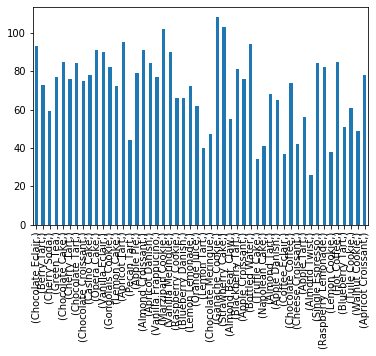

In [119]:
x[0].plot(kind = 'bar')

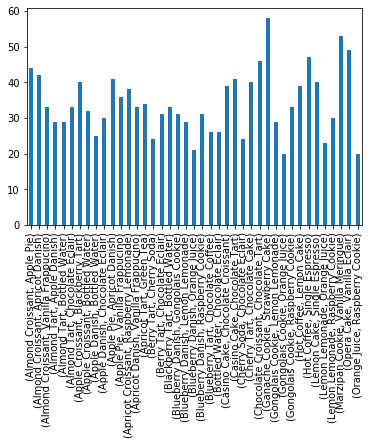

In [122]:
x[1].plot.bar()

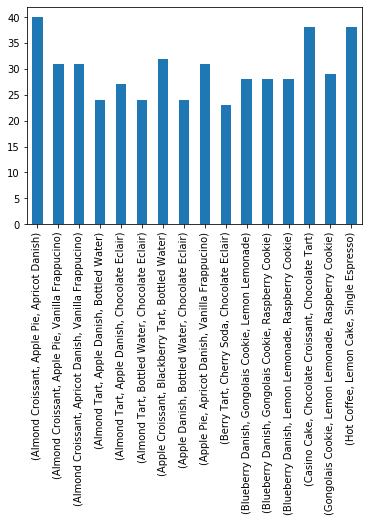

In [123]:
x[2].plot.bar()